In [1]:
import numpy as np
import csv
import pandas
import matplotlib.pyplot as plt

# DATA Regularization - 
# 1. Loading AUTO.CSV data
# 2. It has 398 rows with missing values against "horsepower" > regularizing to remove all null and missing values and get array of 392X5

In [2]:
df = pandas.read_csv("Auto.csv")
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df["horsepower"].isnull().values.any()
df["horsepower"] = pandas.to_numeric( df["horsepower"],errors = 'corece')
df = df.dropna()

# QUES 2 > 

# Use the Auto data set. Create a new variable high that takes values high :=(1 if mpg ≥ 23 0 otherwise (i.e., if mpg ≤ 22). Apply your program to the Auto data set and new variable to predict high given horsepower, weight, year, and origin. (In other words, high is the label and horsepower, weight, year, and origin are the attributes.) Since origin is a qualitative variable, you will have to create appropriate dummy variables. Normalize the attributes, as described in Lab Worksheet 4, Section 5 or Exercise 9 (or Section 4.6.6 of [2]).



# 1. Creating Dummy variables against "ORIGIN", merging with the dataset and then deleting "ORIGIN" attribute from the data

In [4]:
def create_dummies(var):
    # Getting the unique values in var and sort.
    var_unique = var.unique()
    var_unique.sort()
    
    dummy = pandas.DataFrame()
    
    # Looping through all but the last value.
    for val in var_unique[:-1]:
        # Which columns are equal to our unique value.
        d = var == val
        
        # Making a new column with a dummy variable.
        dummy[var.name + "_" + str(val)] = d.astype(int)
    
    # Return dataframe with our dummy variables.
    return dummy

# Making a copy of our auto dataframe to modify with dummy variables.
modified_df = df.copy()

# Making dummy varibles from the origin categories.
origin_dummies = create_dummies(modified_df["origin"])

# Merging dummy varibles to our dataframe.
modified_df = pandas.concat([modified_df, origin_dummies], axis=1)

# Delete cylinders column as we have now explained it with dummy variables.
del modified_df["origin"]

modified_df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,origin_1,origin_2
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,1,0


# 2. Create a variable - 'HIGH' that has values high :=(1 if mpg ≥ 23 0 otherwise (i.e., if mpg ≤ 22)
# Renaming it as Y - Label

In [5]:
def create_high(var):
    d=0
    high = []
    var = np.array(var)
    for i in range(len(var)):
        if (var[i] <= 22):
            d=0
            high.append(d)
        else:
            d=1
            high.append(d)
    high = np.array(high)
    
    return high

# Making HIGH variable against mpg.
Y = create_high(modified_df["mpg"])
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# 3. Deleting all the additional attributes and keeping only 'HORSEPOWER, 'WEIGHT', 'YEAR', "ORIGIN_1" and 'ORIGIN_2' in X - (train + test ) dataset

In [6]:
# Make a copy of our auto dataframe to modify with dummy variables.
modified_df1 = modified_df.copy()

# Delete mpg,cylinders,displacement, acceleration,name column and we have only horsepower, weight, year 
#and origin(origin_1 and origin_2 as dummy variables) in X dataset.
del modified_df1["mpg"]
del modified_df1["cylinders"]
del modified_df1["displacement"]
del modified_df1["acceleration"]
del modified_df1["name"]

X = np.array(modified_df1)

X.shape

(392, 5)

# Now we have X -> with 5 attributes
# Y > label (1,0 values)

# 4. Normalize the attributes - X

In [7]:
X_normed = (X - X.min(0)) / X.ptp(0)
X_normed.shape

(392, 5)

# QUES 3 - Split the Data Set - Train and Test with pseudorandom number generator as MMDD - 830 (DOB - MMDDYY - 083090)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normed, Y, test_size = 0.5, random_state = 830)

# The Below function will perform the below task - 

# Ques 1 - Minimize the Objective Function.

# Ques 4 - Train the algorithm on the train data using Independent Random Numbers in Range [-0.7 0.7].

# Use Stopping Rule to stop Iterations.

# Predict both train and test data and calculate MSE for both train and test data.

# Results in Table produced in REPORT.PDF

In [9]:
# --------------------------Sigmoid Function------------------------
def sigmoid(z):
    s= 1/(1 + np.exp(-z))
    return s

# ----------------------Forward and Backward Propogation alongwith Loss Function--------------------
def propagate(w, b, X, Y):
    
    m = Y.shape[0]
    # compute activation
    A = sigmoid(np.dot(X,w))
      
    epsilon = 1e-5
    cost = (-Y * np.log(A) - (1 - Y) * np.log(1 - A)).mean()
 
    # derivatives
    dz= (A - Y)/m
    dz.shape
    dw = np.dot(X.T, dz)
    db = np.sum(dz)
    cost = np.squeeze(cost)
    grads = {"dw": dw,
             "db": db}

    return grads, cost

# --------------------Prediction against the trained model--------------------
def predict(w, b, X):

    Y_prediction = []
    w = w.reshape(X.shape[1], 1)
    A = sigmoid(np.dot(X,w))  
    Y_prediction = 1. * (A > 0.5)

    return Y_prediction

# ----Optimize function- first - propogate, find updated weights using Learning Rate and Implement stopping rule-----
def optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False):

    costs = []
    tolerance = 0.002

    for i in range(num_iterations):
        m = Y_train.shape[0]
        grads,cost = propagate(w, b, X_train, Y_train)
        b = b - learning_rate*grads["db"]
        new_w = w - learning_rate*grads["dw"]

        # Stopping Rule
        if np.sum(abs(new_w - w)) < tolerance:
            print(i)
            break
        w = new_w

    params = {"w": w,
              "b": b}
    return params, grads, costs

# --------------Method for weight geenration and MSE calculation---------------
def model(X_train, y_train, X_test, y_test, num_iterations, learning_rate, print_cost = False):
    
    #Bias
    b = np.ones((X_train.shape[0], 1)) 
    X_train = np.concatenate((b, X_train), axis=1)
    X_test = np.concatenate((b, X_test), axis=1)
    np.random.seed(1)
    
    #Independent number generation for weight between [-0.7 0.7]
    w = np.random.uniform(low=-0.7,high=0.7,size=(X_train.shape[1],))

    print("learning rate:",learning_rate)
    
    # optimize and finding the model with best suited Weights and bias
    parameters, grads, costs = optimize(w, b, X_train, y_train, num_iterations, learning_rate, print_cost = False)
   
    w = parameters["w"]
    b = parameters["b"]

    # Predict both train and test against optimized weights and Bias
    Y_prediction_train = predict(w,b,X_train)
    Y_prediction_test = predict(w,b,X_test)
    
    Y_hat_train = list(Y_prediction_train)
    y_train_m = list(y_train)
    y_test_m = list(y_test)
    Y_hat_test = list(Y_prediction_test)  
      
    # MSE calculation - for both TRAIN and TEST
    a=0
    correct=0
    for each_train in y_train_m:
        if each_train-Y_hat_train[a]!=0:
            correct+=1
        a+=1
    curr_mse_train = correct/len(y_train_m)
    
    a1=0
    correct1=0
    for each_test in y_test_m:
        if each_test-Y_hat_test[a1]!=0:
            correct1+=1
        a1+=1
    curr_mse_test = correct1/len(y_test_m)
      
    d = {"train MSE": curr_mse_train,
        "test MSE": curr_mse_test}

    return d


# --------------------Main Call for functions implementation------------------
result_train = []
result_test = []

# iterating over 1. different values of epochs and 2. different values of learning rate
epochs = [5000,10000,6000,4000]
lr_list = [0.01,0.15,0.02,0.025]
for i in range(len(epochs)):
    for j in range(len(lr_list)):
        d = model(X_train, y_train, X_test, y_test, num_iterations = epochs[i], learning_rate = lr_list[j], print_cost = True)
        result_train.append(d["train MSE"])
        result_test.append(d["test MSE"])               

print("TRAIN MSE")
print(result_train)
print("TEST MSE")
print(result_test)

learning rate: 0.01
1406
learning rate: 0.15
3644
learning rate: 0.02
1853
learning rate: 0.025
1936
learning rate: 0.01
1406
learning rate: 0.15
3644
learning rate: 0.02
1853
learning rate: 0.025
1936
learning rate: 0.01
1406
learning rate: 0.15
3644
learning rate: 0.02
1853
learning rate: 0.025
1936
learning rate: 0.01
1406
learning rate: 0.15
3644
learning rate: 0.02
1853
learning rate: 0.025
1936
TRAIN MSE
[0.19387755102040816, 0.08163265306122448, 0.1326530612244898, 0.12244897959183673, 0.19387755102040816, 0.08163265306122448, 0.1326530612244898, 0.12244897959183673, 0.19387755102040816, 0.08163265306122448, 0.1326530612244898, 0.12244897959183673, 0.19387755102040816, 0.08163265306122448, 0.1326530612244898, 0.12244897959183673]
TEST MSE
[0.18877551020408162, 0.10714285714285714, 0.1377551020408163, 0.1326530612244898, 0.18877551020408162, 0.10714285714285714, 0.1377551020408163, 0.1326530612244898, 0.18877551020408162, 0.10714285714285714, 0.1377551020408163, 0.132653061224489

# QUES 6 - Running the Logistic Regression over fixed value of Learning Rate - 0.01 and Number of Iterations - 5000 with Stopping Rule
# Running 100 times and presenting result in boxplot

learning rate: 0.01
1290
learning rate: 0.01
1302
learning rate: 0.01
1151
learning rate: 0.01
1074
learning rate: 0.01
1736
learning rate: 0.01
1310
learning rate: 0.01
1682
learning rate: 0.01
1135
learning rate: 0.01
1413
learning rate: 0.01
1339
learning rate: 0.01
1727
learning rate: 0.01
1858
learning rate: 0.01
1579
learning rate: 0.01
1375
learning rate: 0.01
1611
learning rate: 0.01
958
learning rate: 0.01
741
learning rate: 0.01
1601
learning rate: 0.01
1714
learning rate: 0.01
1565
learning rate: 0.01
1273
learning rate: 0.01
1623
learning rate: 0.01
1429
learning rate: 0.01
1536
learning rate: 0.01
1535
learning rate: 0.01
1369
learning rate: 0.01
1308
learning rate: 0.01
1222
learning rate: 0.01
1401
learning rate: 0.01
1271
learning rate: 0.01
1436
learning rate: 0.01
1178
learning rate: 0.01
1666
learning rate: 0.01
1463
learning rate: 0.01
1395
learning rate: 0.01
1786
learning rate: 0.01
1234
learning rate: 0.01
1556
learning rate: 0.01
1055
learning rate: 0.01
1730
le

{'whiskers': [<matplotlib.lines.Line2D at 0x1c73d9b8ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c73d9c9780>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c73d9b8978>],
 'medians': [<matplotlib.lines.Line2D at 0x1c73d9c9fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c73d9d3438>],
 'means': []}

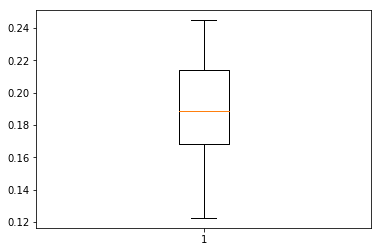

In [10]:
# --------------Method for different values of weight generation and MSE calculation- 100 TIMES--------------
def model(X_train, y_train, X_test, y_test, num_iterations, learning_rate, print_cost = False):
    # Bias
    b = np.ones((X_train.shape[0], 1)) 
    X_train = np.concatenate((b, X_train), axis=1)
    X_test = np.concatenate((b, X_test), axis=1)
    #    np.random.seed(1)
    
    #Different values of Independent number generation for weight between [-0.7 0.7]
    w = np.random.uniform(low=-0.7,high=0.7,size=(X_train.shape[1],))
    print("learning rate:",learning_rate) 

    # optimize and finding the model with best suited Weights and bias
    parameters, grads, costs = optimize(w, b, X_train, y_train, num_iterations, learning_rate, print_cost = False)

    w = parameters["w"]
    b = parameters["b"]

    # Predict both train and test against optimized weights and Bias
    Y_prediction_train = predict(w,b,X_train)
    Y_prediction_test = predict(w,b,X_test)

    Y_hat_train = list(Y_prediction_train)
    y_train_m = list(y_train)
    y_test_m = list(y_test)
    Y_hat_test = list(Y_prediction_test)  
      
    # MSE calculation - for both TRAIN and TEST
    a=0
    correct=0
    for each_train in y_train_m:
        if each_train-Y_hat_train[a]!=0:
            correct+=1
        a+=1
    curr_mse_train = correct/len(y_train_m)

    a1=0
    correct1=0
    for each_test in y_test_m:
        if each_test-Y_hat_test[a1]!=0:
            correct1+=1
        a1+=1
    curr_mse_test = correct1/len(y_test_m)

    d = {"train MSE": curr_mse_train,
        "test MSE": curr_mse_test}
    
#    plt.boxplot(curr_mse_test)
    
    return d


# --------------------Main Call for functions implementation------------------
result_train = []
result_test = []

# Running the model and getting MSE for Epochs - 5000 and Learning Rate - 0.01 (100 times)
for i in range(101):
    d = model(X_train, y_train, X_test, y_test, num_iterations = 5000, learning_rate = 0.01, print_cost = True)
    result_train.append(d["train MSE"])
    result_test.append(d["test MSE"])              

print("TEST MSE")
print(result_test)

#  Boxplot for test MSE
plt.boxplot(result_test)